# Creating final comparision graphs

### STEPS

- Load all data
    - ref
    - GPT
    - Gemini
- fuse into categories
    - calculate new averages for each category
        - from raw data vs avgs?
- create graphs
    - all in 1 ?
    - separate by "model" ?
        - have reference data in each?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
from dotenv import load_dotenv

load_dotenv()

from config.configuration import DATA_FOLDER_PATH

In [83]:
ref = pd.read_csv(f"../../{DATA_FOLDER_PATH}/CES_modified_2005.csv")

# GPT
gpt4o_avg = pd.read_csv(f"../../{DATA_FOLDER_PATH}/averages/averages_GPT-4o.csv")
gpt4o_avg.set_index("#", inplace=True)
gpt4o_raw = pd.read_csv(f"../../{DATA_FOLDER_PATH}/raw_data/raw_data_GPT-4o.csv")
gpt4o_raw.set_index("#", inplace=True)

gpt4omini_avg = pd.read_csv(f"../../{DATA_FOLDER_PATH}/averages/averages_GPT_100.csv")
gpt4omini_avg.set_index("#", inplace=True)
gpt4omini_raw = pd.read_csv(f"../../{DATA_FOLDER_PATH}/raw_data/raw_data_GPT_100.csv")
gpt4omini_raw.set_index("#", inplace=True)

# Gemini
gemini_avg = pd.read_csv(f"../../{DATA_FOLDER_PATH}/averages/averages_GPT_100_v3_xml.csv")
gemini_avg.set_index("#", inplace=True)
gemini_raw = pd.read_csv(f"../../{DATA_FOLDER_PATH}/raw_data/raw_data_GPT_100_v3_xml.csv")
gemini_raw.set_index("#", inplace=True)


In [19]:
slices = [slice(0, 5), slice(5, 11), slice(11, 16), slice(16, 21), slice(21, 23), slice(23, 27), slice(27, None)]
labels = ["active", "passive", "questionable", "no harm", "downloading", "recycling", "doing good"]

In [97]:
category_averages = pd.DataFrame(index=labels, columns=["GPT-4o", "GPT-4o-mini", "Gemini", "Students", "Non-students"])
category_averages["GPT-4o"] = [gpt4o_avg.iloc[s, 0].mean() for s in slices]
category_averages["GPT-4o-mini"] = [gpt4omini_avg.iloc[s, 0].mean() for s in slices]
category_averages["Gemini"] = [gemini_avg.iloc[s, 0].mean() for s in slices]
category_averages["Students"] = [ref.iloc[s, 1].mean() for s in slices]
category_averages["Non-students"] = [ref.iloc[s, 2].mean() for s in slices]

category_errors = pd.DataFrame(index=labels, columns=["GPT-4o", "GPT-4o-mini", "Gemini", "Students", "Non-students"])
category_errors["GPT-4o"] = [gpt4o_avg.iloc[s, 1].std() for s in slices]
category_errors["GPT-4o-mini"] = [gpt4omini_avg.iloc[s, 1].std() for s in slices]
category_errors["Gemini"] = [gemini_raw.groupby("#")["Answers"].std().iloc[s].mean() for s in slices]
category_errors["Students"] = 0
category_errors["Non-students"] = 0

category_errors

,GPT-4o,GPT-4o-mini,Gemini,Students,Non-students
active,0.076673,0.097959,0.124625,0,0
passive,0.099060,0.176588,0.290013,0,0
questionable,0.233854,0.227432,0.391563,0,0
no harm,0.165210,0.139809,0.240394,0,0
downloading,0.084052,0.068271,0.293890,0,0
recycling,0.116674,0.239686,0.035176,0,0
doing good,0.211969,0.163299,0.122552,0,0


In [91]:
gemini_raw.groupby("#")["Answers"].std().iloc[slices[0]]

#
1    0.482418
2    0.140705
3    0.000000
4    0.000000
5    0.000000
Name: Answers, dtype: float64

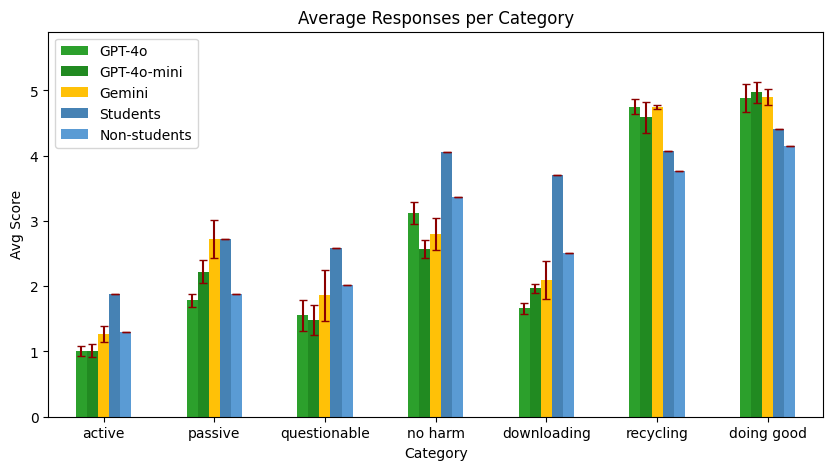

In [99]:
# create plot with error bars 
fig, ax = plt.subplots()
category_averages.plot(
    kind="bar",
    ylim=(0, 5.9),
    yerr=category_errors,
    capsize=3,
    ecolor="darkred",
    color=["#2ca02c", "#218a21", "#FFC107", "#4682b4", "#5a9bd4"],
    ax=ax,
    title="Average Responses per Category",
    xlabel="Category",
    ylabel="Avg Score",
    figsize=(10, 5),
    rot=0,
)

fig.savefig("category_averages.png")

In [60]:
category_averages = pd.DataFrame(index=labels, columns=["GPT-4o", "GPT-100"])
category_averages["GPT-4o"] = [gpt4o_avg.iloc[s, 0].mean() for s in slices]
category_averages["GPT-100"] = [gpt4omini_avg.iloc[s, 0].mean() for s in slices]

stacked = pd.DataFrame()
stacked["avg"] = category_averages.stack(future_stack=True)

category_averages["GPT-4o"] = [gpt4o_avg.iloc[s, 1].mean() for s in slices]
category_averages["GPT-100"] = [gpt4omini_avg.iloc[s, 1].mean() for s in slices]

stacked["std"] = category_averages.stack(future_stack=True)

stacked.head()

avg       std
active       GPT-4o   1.006000  0.034289
             GPT-100  1.010000  0.043809
passive      GPT-4o   1.783333  0.366535
             GPT-100  2.221667  0.254370
questionable GPT-4o   1.552000  0.224930

In [62]:
print(stacked["avg"].unstack())

                GPT-4o   GPT-100
active        1.006000  1.010000
passive       1.783333  2.221667
questionable  1.552000  1.484000
no harm       3.118000  2.572000
downloading   1.660000  1.970000
recycling     4.752500  4.587500
doing good    4.882500  4.970000


In [48]:
active = pd.DataFrame()
active = gpt4o_avg.iloc[slices[0], 0]
print(active)

#
1    1.03
2    1.00
3    1.00
4    1.00
5    1.00
Name: Averages, dtype: float64


In [24]:
# get category averages
active.mean()

Averages    1.006000
std         0.034289
dtype: float64

In [42]:
active_raw = pd.DataFrame()
active_raw = gpt4o_raw[gpt4o_raw.index.isin(range(slices[0].start, slices[0].stop + 1))]
print(active_raw)

                                            Questions  Iterations  Answers
#                                                                         
1   Returning damaged goods when the damage was yo...           0        1
1   Returning damaged goods when the damage was yo...           1        1
1   Returning damaged goods when the damage was yo...           2        1
1   Returning damaged goods when the damage was yo...           3        1
1   Returning damaged goods when the damage was yo...           4        1
..                                                ...         ...      ...
5   Reporting a lost item as "stolen" to an insura...          95        1
5   Reporting a lost item as "stolen" to an insura...          96        1
5   Reporting a lost item as "stolen" to an insura...          97        1
5   Reporting a lost item as "stolen" to an insura...          98        1
5   Reporting a lost item as "stolen" to an insura...          99        1

[500 rows x 3 columns]


In [44]:
active_raw["Answers"].mean()

1.006

In [40]:
gpt4o_raw.head()

,Questions,Iterations,Answers
#,,,
1,Returning damaged goods when the damage was yo...,0,1
1,Returning damaged goods when the damage was yo...,1,1
1,Returning damaged goods when the damage was yo...,2,1
1,Returning damaged goods when the damage was yo...,3,1
1,Returning damaged goods when the damage was yo...,4,1


In [38]:
sl = slices[0]
number = 5
print(sl)
print(number in range(sl.start, sl.stop + 1))
print(sl.start)
print(sl.stop)

slice(0, 5, None)
True
0
5
